In [13]:
# import
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# reading our clean dataset
df = pd.read_csv('df_clean.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   distance        388 non-null    float64
 1   consume         388 non-null    float64
 2   speed           388 non-null    int64  
 3   temp_inside     388 non-null    float64
 4   temp_outside    388 non-null    int64  
 5   gas_type        388 non-null    object 
 6   AC              388 non-null    int64  
 7   rain            388 non-null    int64  
 8   sun             388 non-null    int64  
 9   gas_type_coded  388 non-null    int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 30.4+ KB


In [12]:
# correlation matrix
corr = df.corr()
corr

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,gas_type_coded
distance,1.000000,-0.128967,0.562299,0.075175,0.088175,-0.025738,-0.019791,0.081120,-0.053411
consume,-0.128967,1.000000,-0.227866,-0.160629,-0.320811,0.096591,0.248118,-0.170667,-0.015327
speed,0.562299,-0.227866,1.000000,0.059292,0.015411,-0.035408,0.009489,0.081618,-0.097360
temp_inside,0.075175,-0.160629,0.059292,1.000000,0.359502,0.297372,-0.036939,0.242248,0.010203
temp_outside,0.088175,-0.320811,0.015411,0.359502,1.000000,0.167562,-0.186315,0.346903,0.148705
AC,-0.025738,0.096591,-0.035408,0.297372,0.167562,1.000000,0.242915,0.088598,0.105285
rain,-0.019791,0.248118,0.009489,-0.036939,-0.186315,0.242915,1.000000,-0.112650,0.060328
sun,0.081120,-0.170667,0.081618,0.242248,0.346903,0.088598,-0.112650,1.000000,0.022761
gas_type_coded,-0.053411,-0.015327,-0.097360,0.010203,0.148705,0.105285,0.060328,0.022761,1.000000


## There is not a clear correlation between variables

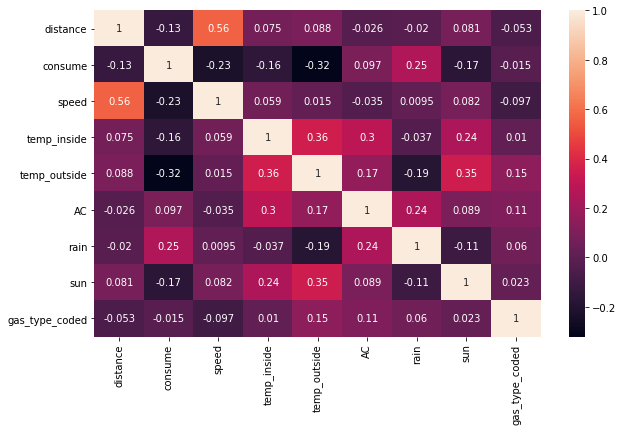

In [16]:
# heatmap
plt.figure(figsize = (10,6))
sns.heatmap(corr, annot = True);

# Distance & average Speed, by gas type
- Higher distances usually mean higher speed
- Long distances are been drived using SP98 rather than E10

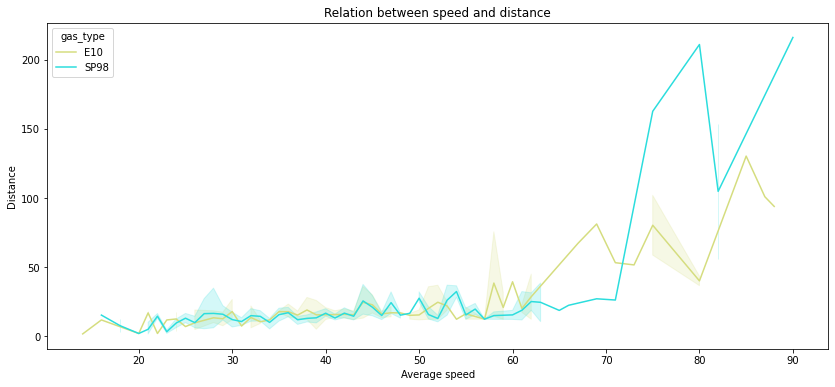

In [49]:
# We start analyzing the higher correlation in the matrix
plt.figure(figsize = (14, 6))
plot_speed_distance = sns.lineplot(x = df.speed, 
                                  y = df.distance,
                                  hue = df.gas_type,
                                  palette = 'rainbow_r');
plot_speed_distance.set(xlabel = 'Average speed', 
                        ylabel = 'Distance',
                       title = 'Relation between speed and distance');

plt.show()

# Distance & consume, by gas type

- Consume decreases with longer distances, independently of the gas type
- The consume of SP98 keeps more stable in large distances than the E10
- For distances between 40-55 km, could be recommeded to use E10

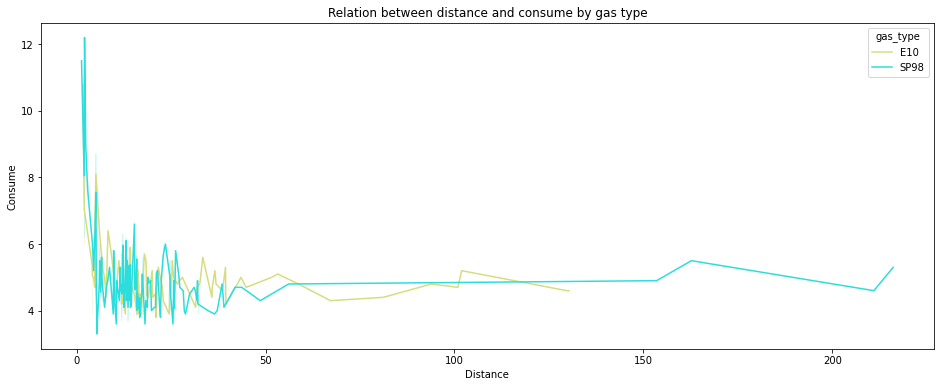

In [47]:
plt.figure(figsize = (16, 6))
plot_dist_consume = sns.lineplot(x = df.distance, 
                                  y = df.consume,
                                  hue = df.gas_type,
                                  palette = 'rainbow_r');
plot_dist_consume.set(xlabel = 'Distance', 
                      ylabel = 'Consume',
                      title = 'Relation between distance and consume by gas type');

plt.show()

# Consume by gas type

- Mean consume with E10 is kept more stable (less variable) than with SP98
- Mean consume is a little bit higher with E10
- Variability in SP98 consume must be caused by other factors

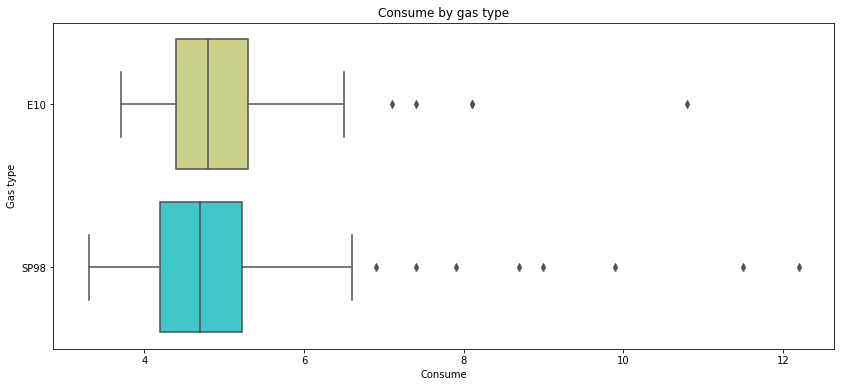

In [46]:
plt.figure(figsize = (14, 6))
plot_dist_consume = sns.boxplot(x = df.consume, 
                                  y = df.gas_type,
                                  palette = 'rainbow_r');
plot_dist_consume.set(xlabel = 'Consume', 
                      ylabel = 'Gas type',
                      title = 'Consume by gas type');

plt.show()

# Average Speed & Consume, by Gas Type
- Higher consume when the speed is lower, in both gases type

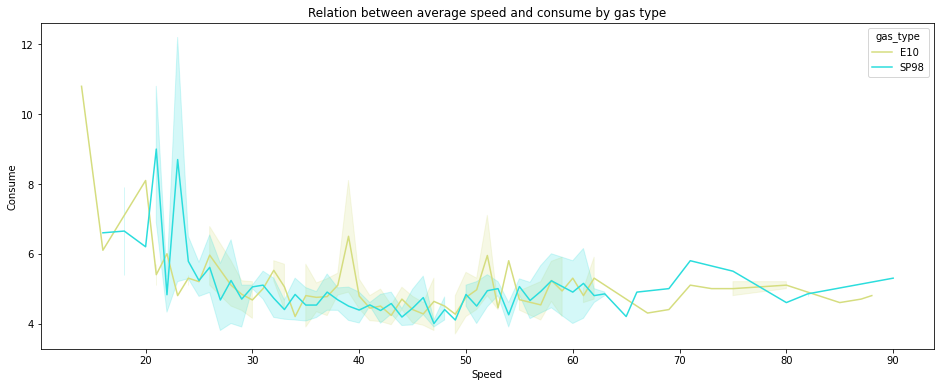

In [52]:
plt.figure(figsize = (16, 6))
plot_dist_consume = sns.lineplot(x = df.speed, 
                                  y = df.consume,
                                  hue = df.gas_type,
                                  palette = 'rainbow_r');
plot_dist_consume.set(xlabel = 'Speed', 
                      ylabel = 'Consume',
                      title = 'Relation between average speed and consume by gas type');

plt.show()

# Temperature inside the car & Consume, by Gas Type
- Higher consume with SP98 when the temperature inside the car is 23,5

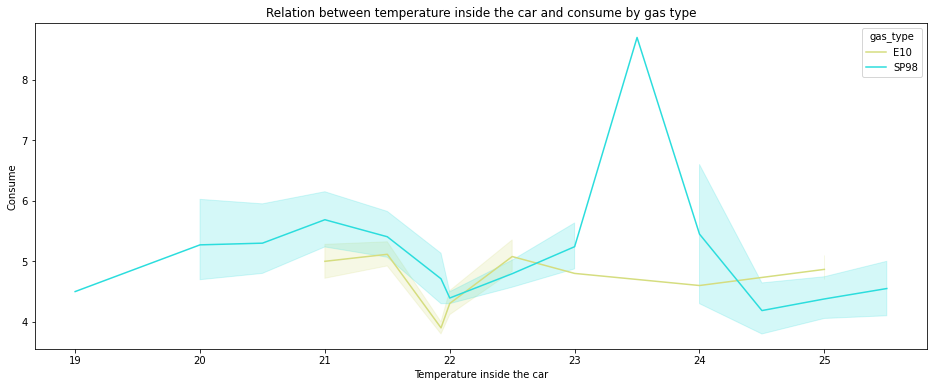

In [54]:
plt.figure(figsize = (16, 6))
plot_dist_consume = sns.lineplot(x = df.temp_inside, 
                                  y = df.consume,
                                  hue = df.gas_type,
                                  palette = 'rainbow_r');
plot_dist_consume.set(xlabel = 'Temperature inside the car', 
                      ylabel = 'Consume',
                      title = 'Relation between temperature inside the car and consume by gas type');

plt.show()

# Air Conditioner & Consume, by Gas Type
- Without AC, the consume is almost equal between both gas types (a little bit higher with E10)
- With AC ON, the consume of both increases slightly, growing more for SP98

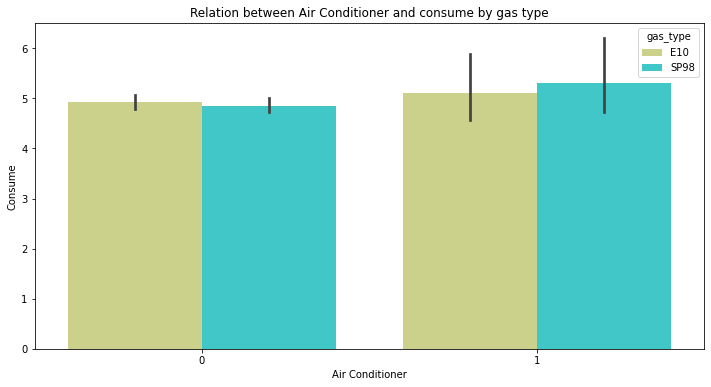

In [60]:
plt.figure(figsize = (12, 6))
plot_dist_consume = sns.barplot(x = df.AC, 
                                  y = df.consume,
                                  hue = df.gas_type,
                                  palette = 'rainbow_r');
plot_dist_consume.set(xlabel = 'Air Conditioner', 
                      ylabel = 'Consume',
                      title = 'Relation between Air Conditioner and consume by gas type');

plt.show()

# Temperature outside the car & Consume, by Gas Type
- Doesn't seem to be a difference between gas types related to the temperature outside the car

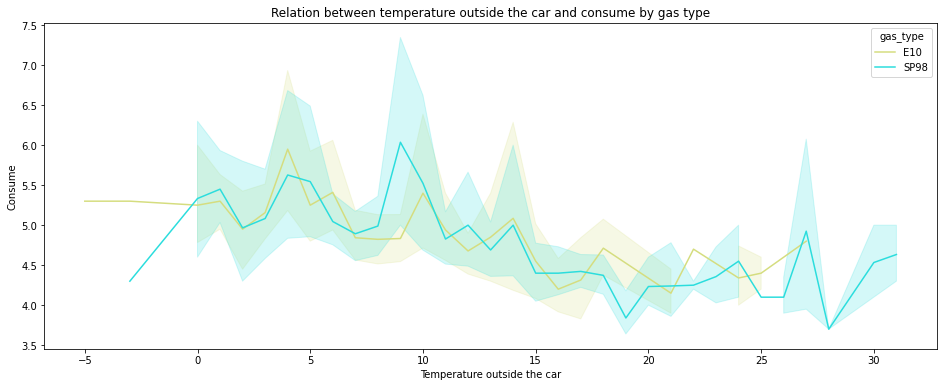

In [56]:
plt.figure(figsize = (16, 6))
plot_dist_consume = sns.lineplot(x = df.temp_outside, 
                                  y = df.consume,
                                  hue = df.gas_type,
                                  palette = 'rainbow_r');
plot_dist_consume.set(xlabel = 'Temperature outside the car', 
                      ylabel = 'Consume',
                      title = 'Relation between temperature outside the car and consume by gas type');

plt.show()

# Rain & Consume relation, by Gas Type
- Without rain, the consume is slightly higher with E10
- This little difference decreases with rain, bringing both types closer together

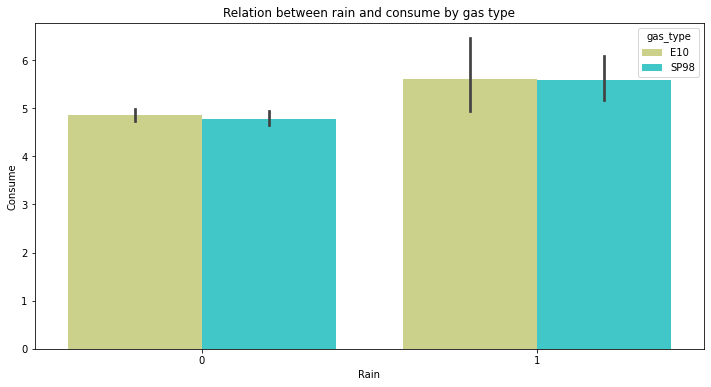

In [62]:
plt.figure(figsize = (12, 6))
plot_dist_consume = sns.barplot(x = df.rain, 
                                  y = df.consume,
                                  hue = df.gas_type,
                                  palette = 'rainbow_r');
plot_dist_consume.set(xlabel = 'Rain', 
                      ylabel = 'Consume',
                      title = 'Relation between rain and consume by gas type');

plt.show()

# Sun & Consume relation, by Gas Type
- Without sun, the consume almost the same for both types
- In sunny days, the consume is decreased for both, specially for SP98

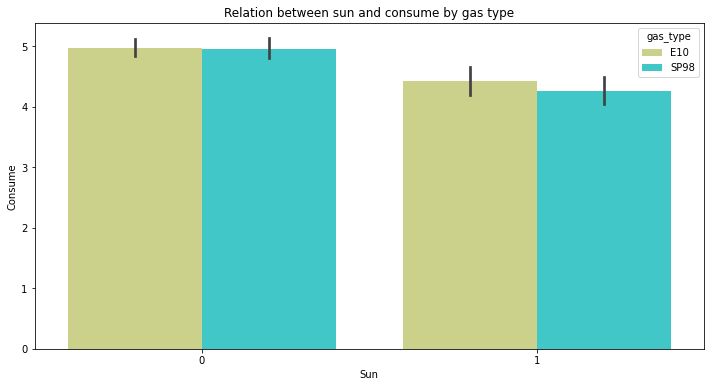

In [63]:
plt.figure(figsize = (12, 6))
plot_dist_consume = sns.barplot(x = df.sun, 
                                  y = df.consume,
                                  hue = df.gas_type,
                                  palette = 'rainbow_r');
plot_dist_consume.set(xlabel = 'Sun', 
                      ylabel = 'Consume',
                      title = 'Relation between sun and consume by gas type');

plt.show()